https://drive.google.com/file/d/10YTh2R7xQDo6afDV9FU42SsdLx8ECnrz/view?usp=share_link

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
! gdown 10YTh2R7xQDo6afDV9FU42SsdLx8ECnrz

Downloading...
From: https://drive.google.com/uc?id=10YTh2R7xQDo6afDV9FU42SsdLx8ECnrz
To: /content/heart.csv
100% 35.9k/35.9k [00:00<00:00, 45.1MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
X = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

X.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1


In [ ]:
df['Age_group_mid'] = pd.cut(df['Age'], 10)
df.loc[:, 'Age_group_mid'] = df['Age_group_mid'].apply(lambda x: int(x.mid))

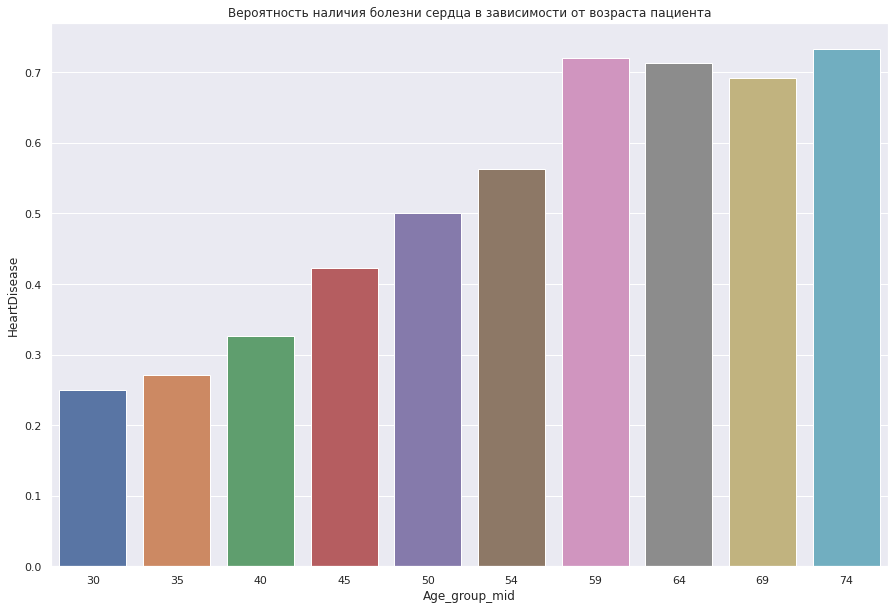

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data=df, x='Age_group_mid', y='HeartDisease', estimator=np.mean, ci=None)\
.set(title='Вероятность наличия болезни сердца в зависимости от возраста пациента');

In [ ]:
y = X['HeartDisease']
del X['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.8315217391304348)

In [ ]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        77
           1       0.85      0.86      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [ ]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
clf_rf.score(X_train, y_train), clf_rf.score(X_test, y_test)

(1.0, 0.875)

In [ ]:
print(classification_report(y_test, clf_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
sorted_zip = sorted(zip(clf_rf.feature_importances_, X.columns), key=lambda x: x[0])
sorted_feachures_importance, sorted_X = map(list,zip(*sorted_zip))

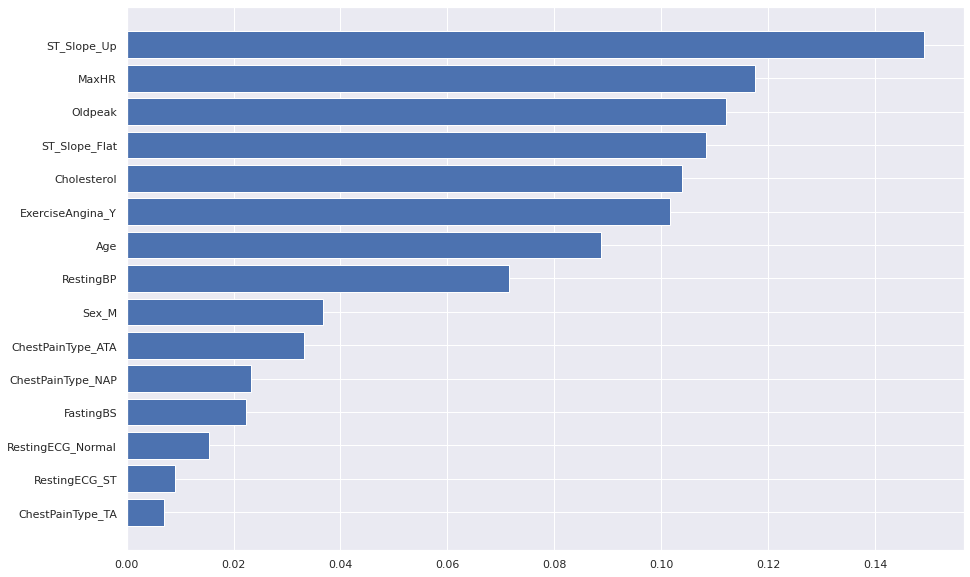

In [ ]:
plt.barh(np.arange(len(clf_rf.feature_importances_)), sorted_feachures_importance)
plt.yticks(np.arange(len(X.columns)), sorted_X)
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

In [ ]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5)

In [ ]:
bagging.score(X_train, y_train), bagging.score(X_test, y_test)

(0.9455040871934605, 0.8152173913043478)

In [ ]:
print(classification_report(y_test, bagging.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        77
           1       0.86      0.81      0.84       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeCV

In [ ]:
Classifier = StackingClassifier(
    [
        ('DecisionTreeClassifier', DecisionTreeClassifier()),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('LinearSVC', LinearSVC())
    ])

In [ ]:
Classifier.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('LinearSVC', LinearSVC())])

In [ ]:
Classifier.score(X_train, y_train), Classifier.score(X_test, y_test)

(0.9945504087193461, 0.8641304347826086)

In [ ]:
print(classification_report(y_test, Classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Выводы:

1) Наилучшие метрики на тестовой выборке показал RandomForest